In [1]:
import numpy as np 
import pandas as pd 
import yellowbrick
from yellowbrick.text import FreqDistVisualizer


# sklearn 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA


# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

###
import logging

from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pandas import pivot

%matplotlib inline

In [2]:
data_temperatures = pd.read_csv('/Users/Alexandra/Documents/02_Curso_Data_Science/Proyecto_5_Final_Project/Temperaturas_Medianas_mensuales_del_aire_de_la_cuidad_Barcelona_desde_1780/temperaturesbarcelonadesde1780_format_long.csv')
data_rainfalls = pd.read_csv('/Users/Alexandra/Documents/02_Curso_Data_Science/Proyecto_5_Final_Project/Precipitaciones acumuladas mensuales de la ciudad de Barcelona_desde_1786_Ciudad_servicios_Medio_ambiente/precipitacionsbarcelonadesde1786_format_long.csv')




In [3]:
print('Training data shape Temperatures: ', data_temperatures.shape)
print('Training data shape Temperatures: ', data_rainfalls.shape)


Training data shape Temperatures:  (2880, 4)
Training data shape Temperatures:  (2808, 4)


In [4]:
data_temperatures['dateInt']=data_temperatures['Any'].astype(str) + data_temperatures['Mes'].astype(str).str.zfill(2)

data_temperatures['fecha'] = pd.to_datetime(data_temperatures['dateInt'], format='%Y%m')

data_temperatures=data_temperatures.drop(['dateInt'], axis=1)

data_temperatures.head(5)

,Any,Mes,Desc_Mes,Temperatura,fecha
0,1780,1,Gener,6.7,1780-01-01
1,1780,2,Febrer,7.3,1780-02-01
2,1780,3,Març,11.6,1780-03-01
3,1780,4,Abril,11.4,1780-04-01
4,1780,5,Maig,16.3,1780-05-01


In [5]:
data_rainfalls['dateInt']=data_rainfalls['Any'].astype(str) + data_rainfalls['Mes'].astype(str).str.zfill(2)

data_rainfalls['fecha'] = pd.to_datetime(data_rainfalls['dateInt'], format='%Y%m')

data_rainfalls=data_rainfalls.drop(['dateInt'], axis=1)

data_rainfalls.head(5)

,Any,Mes,Desc_Mes,Precipitacions,fecha
0,1786,1,Gener,32.8,1786-01-01
1,1786,2,Febrer,28.4,1786-02-01
2,1786,3,Març,84.4,1786-03-01
3,1786,4,Abril,42.3,1786-04-01
4,1786,5,Maig,8.5,1786-05-01


In [6]:
df_result = pd.merge(data_temperatures, data_rainfalls, on=['fecha'])

df_result.head()

df_result.columns

df_result=df_result.drop(['Any_x', 'Mes_x', 'Desc_Mes_x'],axis=1)

df_result.columns

df_result.columns = ['Temperatura', 'fecha', 'Año', 'Mes', 'Desc_Mes',
       'Precipitacions']
df_result = df_result[[ 'fecha', 'Año', 'Mes', 'Desc_Mes',
       'Temperatura','Precipitacions' ]]

df_result



#df_result = df_result[['fecha','Temperatura','Precipitacions', 'Any_y','Mes_y', 'Desc_Mes_y']]


df_result.head(5)

# Overview of data


index_data = df_result.set_index('fecha')
index_data

,Año,Mes,Desc_Mes,Temperatura,Precipitacions
fecha,,,,,
1786-01-01,1786,1,Gener,7.8,32.8
1786-02-01,1786,2,Febrer,8.3,28.4
1786-03-01,1786,3,Març,9.9,84.4
1786-04-01,1786,4,Abril,12.8,42.3
1786-05-01,1786,5,Maig,16.8,8.5
1786-06-01,1786,6,Juny,20.2,38.0
1786-07-01,1786,7,Juliol,20.9,6.8
1786-08-01,1786,8,Agost,21.1,52.1
1786-09-01,1786,9,Setembre,19.5,62.0


### Info por año

In [7]:
year_avg_t = pd.pivot_table(index_data, values='Temperatura', index='Año', aggfunc='mean')
year_avg_t['10 Years MA'] = year_avg_t['Temperatura'].rolling(10).mean()
#year_avg_t[['Temperatura','10 Years MA']].plot(figsize=(20,6))
#plt.title('Yearly AVG Temperatures in Barcelona')
#plt.xlabel('Months')
#plt.ylabel('Temperature')
#plt.xticks([x for x in range(1780,2019,10)])
#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')
#plt.show()

# influencia de la industrializacion

## ML SARIMA/ARIMA

<html>
<head>
<title></title>
</head>
<body>

<h2>ARIMA</h2>
ARIMA stands for AutoRegressive Integrated Moving Average. 

<p>  <u><b>AR (Autoregression):</b></u> A model that uses the dependent relationship between an observation and some number of lagged observations. p is a parameter of how many lagged observations to be taken in.</p><br />
<p> <u><b>I (Integrated):</b></u> A model that uses the differencing of raw observations (e.g. subtracting an observation from the previous time step). Differencing in statistics is a transformation applied to time-series data in order to make it stationary. This allows the properties do not depend on the time of observation, eliminating trend and seasonality and stabilizing the mean of the time series. </p><br />
<p><u><b>MA (Moving Average):</b></u> A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. q is a parameter of how many lagged observations to be taken in. Contrary to the AR model, the finite MA model is always stationary.</p><br />
<p>
Parameters of the ARIMA model</p><br />
<p><b>p (lag order):</b> number of lag observations included in the model<br />
<b>d (degree of differencing):</b> number of times that the raw observations are differenced<br />
<b>q (order of moving average):</b> size of the moving average window</p><br />
ARIMA models with python<br />
<p></p>
<p></p>

<h3>Time Series: Check Stationarity</h3>

<p><b>Stationary Time Series:</b>data does not have any upward or downward trend or seasonal effects. Mean or variance are consistent over time</p><br />
<b>Non-Stationary Time Series:</b> data show trends, seasonal effects, and other structures depend on time. Forecasting performance is dependent on the time of observation. Mean and variance change over time and a drift in the model is captured.</p><br />
<p><b><u>Checks for Stationarity</u></b><br /></p>
<b>Look at Plots:</b> plot a run sequence plot to see anything with an obvious trend or seasonal effects. Look at Plots #1, run sequence plot obviously shows an upward trend as time goes by. We can also observe seasonal trends from similar shape in each year. <br />
<b>Summary Statistics:</b> partition your data into intervals and check for obvious or significant differences in summary statistics. Look at Plots #2, if the data is stationary the summary statistics should be consistent over time. The mean should be consistent with a consistent variance indicating a Gaussian distribution. The histogram does not show Gaussian distribution and another indication of non-stationary time series data.</b><br />
<b>Statistical Test:</b> use statistical tests if the expectations of stationarity are met or violated</b><br />

<h3>Cross-Validation for Time Series</h3>
https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a
<p>Cross-validation for time series is different from machine-learning problems that time or sequence is not involved. In the case of the absence of time, we select a random subset of data as a validation set to estimate the accuracy of the measurement. In time series, we often predict a value in the future. Therefore, the validation data always has to occur after the training data. There are two schemas sliding-window and Forward Chaining validation methods, that can be used for the time series CV.</p>
   <u> </u><b> </b><br /><p></p>


</p>
<u></u>
</body>
</html>

## Estacionalidad

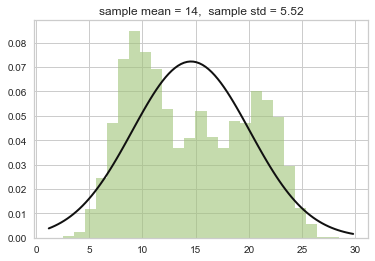

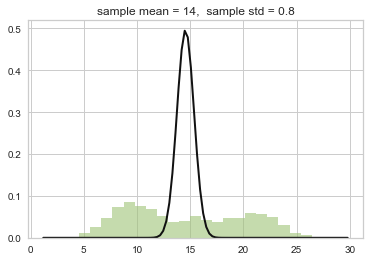

In [8]:
## gaussian distribution
##year_avg_t
##df_result
#### Por mes
from scipy.stats import norm
mu, std = norm.fit(df_result.Temperatura)
plt.hist(df_result.Temperatura, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('sample mean = {},  sample std = {}'.format(int(round(mu, 2)), round(std, 2)))
plt.show()

########
## por año
mu, std = norm.fit(year_avg_t.Temperatura)
plt.hist(df_result.Temperatura, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('sample mean = {},  sample std = {}'.format(int(round(mu, 2)), round(std, 2)))
plt.show()

## divido el dataset en dos miro las diferentes medias, si son diferentes otra probabilidad de que no sea estacional

In [9]:
y_log=year_avg_t.Temperatura
#### Por año
X_0 = year_avg_t.Temperatura
split_0 = int(len(X_0) / 2)
X1_0, X2_0 = X_0[0:split_0], X_0[split_0:]
mean1_1, mean2_1 = X1_0.mean(), X2_0.mean()
var1_1, var2_1 = X1_0.var(), X2_0.var()
print('mean1=%f, mean2=%f' % (mean1_1, mean2_1))
print('variance1=%f, variance2=%f' % (var1_1, var2_1))

### por mes

X_1 = df_result.Temperatura
split_1 = int(len(X_1) / 2)
X1_1, X2_1 = X_1[0:split_1], X_1[split_1:]
mean1, mean2 = X1_1.mean(), X2_1.mean()
var1, var2 = X1_1.var(), X2_1.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=14.132123, mean2=14.990527
variance1=0.364290, variance2=0.565742
mean1=14.132123, mean2=14.990527
variance1=29.292888, variance2=31.268257


### no son iguales, no es estacional

# lo mismo en escala logaritmica

In [10]:
#### por año
result_log_0 = adfuller(np.log(X_0))
print('ADF Statistic: %f' % result_log_0[0])
print('p-value: %f' % result_log_0[1])
print('Critical Values:')
for key, value in result_log_0[4].items():
    print('\t%s: %.3f' % (key, value))

## por mes

result_log_1 = adfuller(np.log(X_1))
print('ADF Statistic: %f' % result_log_1[0])
print('p-value: %f' % result_log_1[1])
print('Critical Values:')
for key, value in result_log_1[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.510983
p-value: 0.528071
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574
ADF Statistic: -4.658834
p-value: 0.000100
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


por mes es estacional, pero por año no lo es

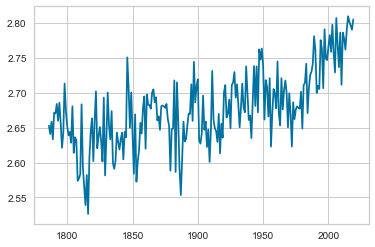

In [11]:
y_log=year_avg_t.Temperatura
df_log = np.log(y_log)
plt.plot(df_log)

no es estacional otra vez

<h2>CONCLUSIÓN</h2>

<h3>TS no estacionario</h3>

<p>  <u><b>La razón:</b></u> Usando el test estadístico "Augmented Dickey-Fuller", nos dice que si el ADF> que  CV(1%) y el p-value >0.005, los datos no son estacionarios. Para poder hacer ML en un Time Series debemos evitar los picos y datos que fluctian demasiado, con lo cual tenemos que reducir el ruido.</p><br />
<u><b>Utilizré diferencia ción para hacer mi modelo estacionario</b></u>

# Modelado de metodo de ML SARIMA/ARIMA

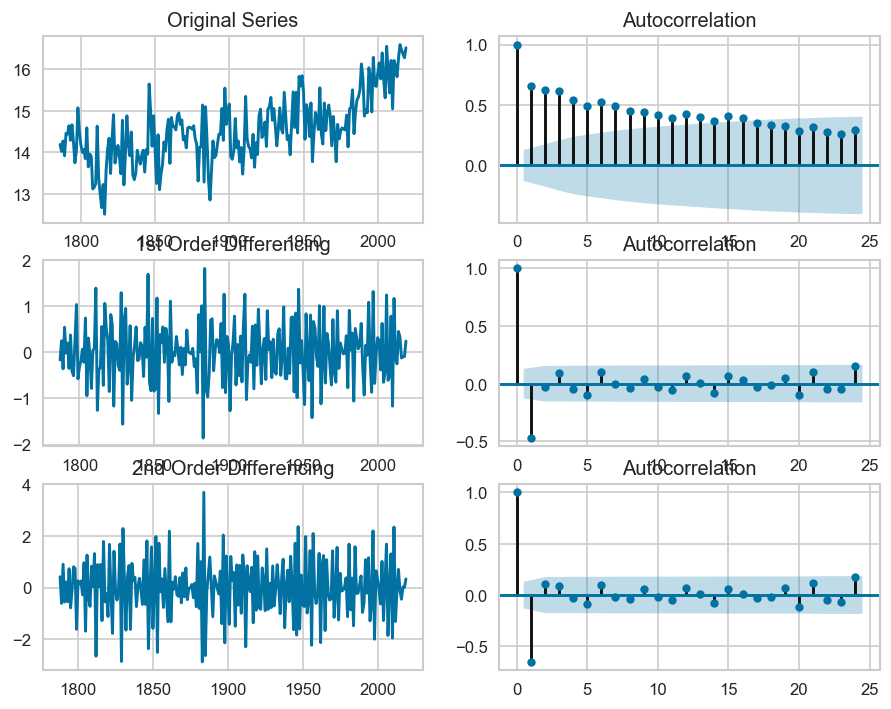

In [12]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data

## definición de d=?
# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(year_avg_t.Temperatura); axes[0, 0].set_title('Original Series')
plot_acf(year_avg_t.Temperatura, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(year_avg_t.Temperatura.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(year_avg_t.Temperatura.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(year_avg_t.Temperatura.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(year_avg_t.Temperatura.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

d=1, me quedo con el 1 ya que el segundo fluctua más y tendrá más ruido

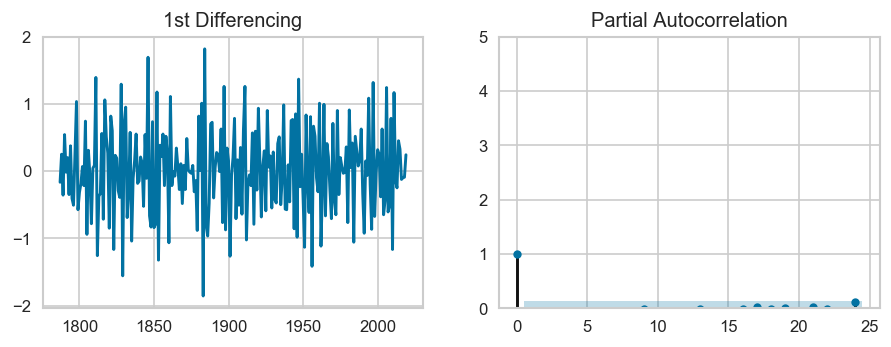

In [13]:
# valor de p=0
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(year_avg_t.Temperatura.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(year_avg_t.Temperatura.diff().dropna(), ax=axes[1])

plt.show()

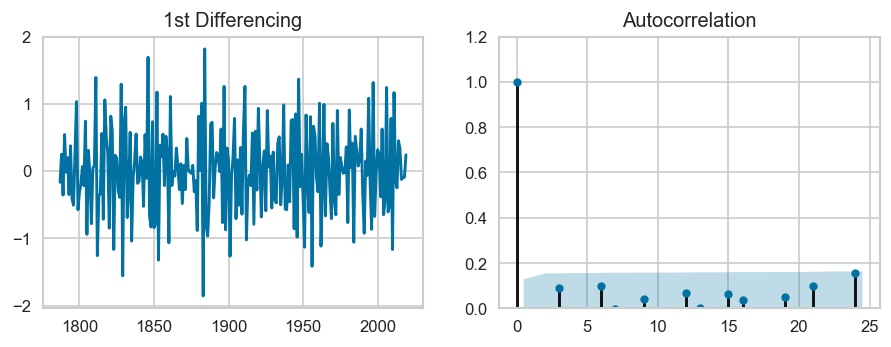

In [14]:
# valor de q=1
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data


fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(year_avg_t.Temperatura.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(year_avg_t.Temperatura.diff().dropna(), ax=axes[1])

plt.show()

#### d,p,q=1,0,0 (según el analisis estadistico preliminar manual)

# Creamos el test y la parte de entreno

In [15]:
from statsmodels.tsa.stattools import acf

# Create Training and Test 75/25
train = year_avg_t.Temperatura[:225]
test = year_avg_t.Temperatura[225:]

# 1. mix de terminos. Los vistos en el analisis estadístico
## probamos con los ajuste iniciales del analisis estadístico sobre toda la info para ver como se comporta

                             ARIMA Model Results                              
Dep. Variable:          D.Temperatura   No. Observations:                  233
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -203.239
Method:                       css-mle   S.D. of innovations              0.579
Date:                Thu, 21 May 2020   AIC                            412.478
Time:                        12:41:31   BIC                            422.831
Sample:                             1   HQIC                           416.653
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0099      0.026      0.385      0.701      -0.041       0.061
ar.L1.D.Temperatura    -0.4704      0.058     -8.170      0.000      -0.583      -0.358
                

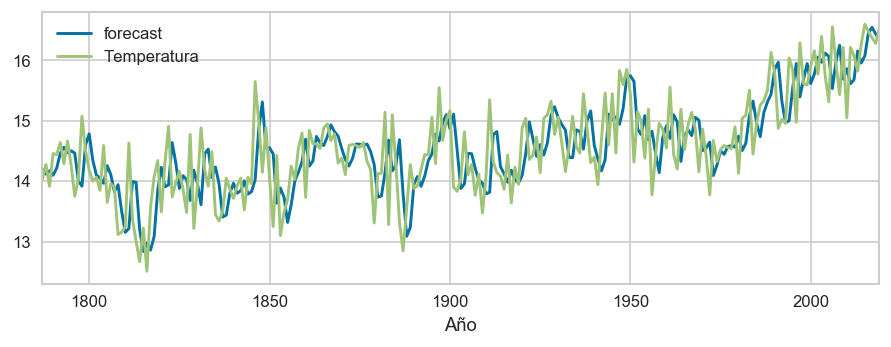

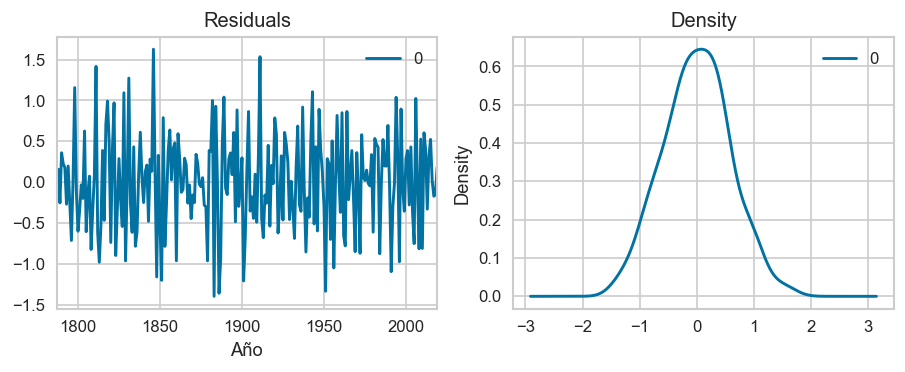

In [16]:
from statsmodels.tsa.arima_model import ARIMA

# 1,0,0 ARIMA Model
model_1 = ARIMA(year_avg_t.Temperatura, order=(1,1,0))
model_fit_1 = model_1.fit(disp=0)
print(model_fit_1.summary())
model_fit_1.plot_predict(dynamic=False)
## residual
residuals_1 = pd.DataFrame(model_fit_1.resid)
fig, ax = plt.subplots(1,2)
residuals_1.plot(title="Residuals", ax=ax[0])
residuals_1.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<h3>Accuracy Metrics</h3>


The commonly used accuracy metrics to judge forecasts are:

<p> <u><b>Mean Absolute Percentage Error (MAPE</b></u>)<br />
<u><b>Mean Error (ME)</b></u><br />
<u><b>Mean Absolute Error (MAE)</b></u><br />
<u><b>Mean Percentage Error (MPE)</b></u><br />
<u><b>Root Mean Squared Error (RMSE)</b></u><br />
<u><b>Lag 1 Autocorrelation of Error (ACF1)</b></u><br />
<u><b>Correlation between the Actual and the Forecast (corr)</b></u><br />
<u><b>Min-Max Error (minmax)</b></u></p><br />
Typically, if you are comparing forecasts of two different series, the MAPE, Correlation and Min-Max Error can be used.

<u><b>Why not use the other metrics?</b></u>

Because only the above three are percentage errors that vary between 0 and 1. That way, you can judge how good is the forecast irrespective of the scale of the series.

The other error metrics are quantities. That implies, an RMSE of 100 for a series whose mean is in 1000’s is better than an RMSE of 5 for series in 10’s. So, you can’t really use them to compare the forecasts of two different scaled time series.
<p>  <u><b></b></u> </p><br />
<u><b></b></u>

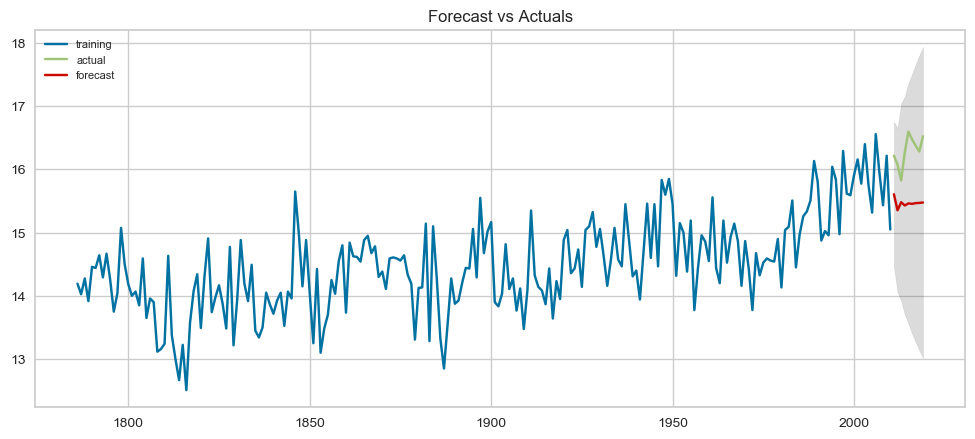

{'mape': 0.05060169824243441,
 'me': -0.8274891774485267,
 'mae': 0.8274891774485267,
 'mpe': -0.05060169824243441,
 'rmse': 0.8591904600279805,
 'acf1': 0.2952638841974845,
 'corr': 0.054700764677318506,
 'minmax': 0.050601698242434434}

In [17]:
# Build Model
# model = ARIMA(train, order=(1,1,0))  
model_0 = ARIMA(train, order=(1, 1, 0))  
fitted = model_0.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(9, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)



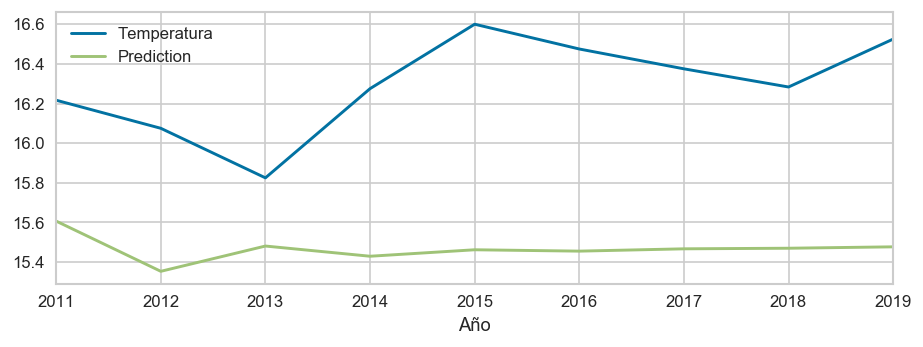

In [18]:
future_forecast = pd.DataFrame(fc,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()


# 2. mix de terminos 
### ajustamos p y tenemos un mejor AIC, lo reducimos con respecto a lo anterior. Este es el mejor de todos

                             ARIMA Model Results                              
Dep. Variable:          D.Temperatura   No. Observations:                  233
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -184.156
Method:                       css-mle   S.D. of innovations              0.532
Date:                Thu, 21 May 2020   AIC                            376.312
Time:                        12:41:34   BIC                            390.116
Sample:                             1   HQIC                           381.879
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0092      0.008      1.154      0.250      -0.006       0.025
ar.L1.D.Temperatura     0.0767      0.104      0.739      0.461      -0.127       0.280
ma.L1.D.Temperat

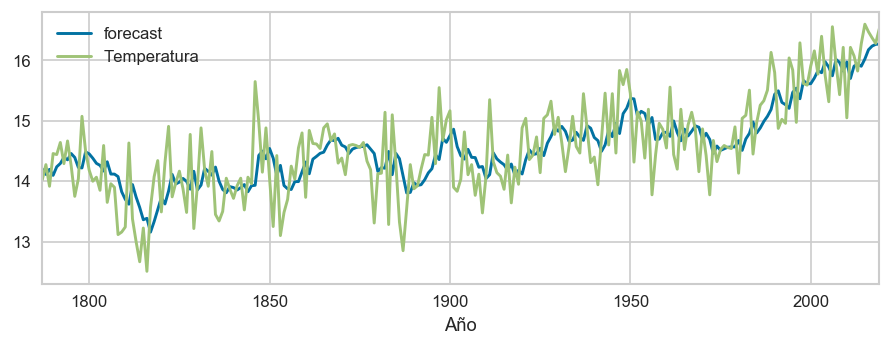

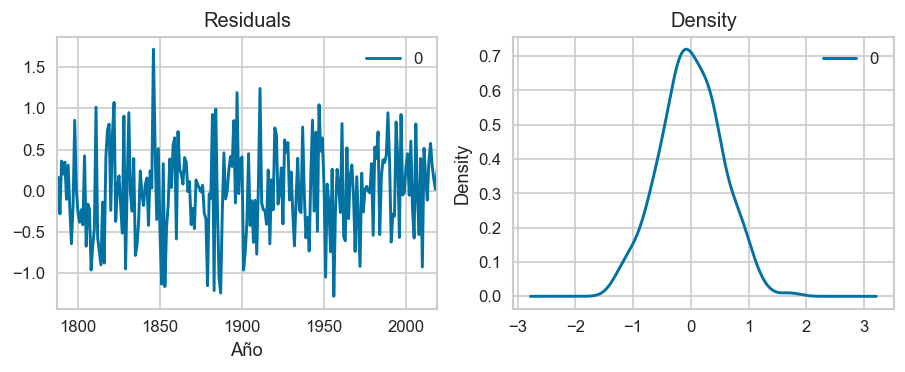

In [19]:
# 1,1,1 ARIMA Model = este es el mejor de los manuales que he hecho
model_2 = ARIMA(year_avg_t.Temperatura, order=(1,1,1))
model_fit_2 = model_2.fit(disp=0)
print(model_fit_2.summary())
model_fit_2.plot_predict(dynamic=False)
## residual
residuals_2 = pd.DataFrame(model_fit_2.resid)
fig, ax = plt.subplots(1,2)
residuals_2.plot(title="Residuals", ax=ax[0])
residuals_2.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


<h3>Accuracy Metrics</h3>


The commonly used accuracy metrics to judge forecasts are:

<p> <u><b>Mean Absolute Percentage Error (MAPE</b></u>)<br />
<u><b>Mean Error (ME)</b></u><br />
<u><b>Mean Absolute Error (MAE)</b></u><br />
<u><b>Mean Percentage Error (MPE)</b></u><br />
<u><b>Root Mean Squared Error (RMSE)</b></u><br />
<u><b>Lag 1 Autocorrelation of Error (ACF1)</b></u><br />
<u><b>Correlation between the Actual and the Forecast (corr)</b></u><br />
<u><b>Min-Max Error (minmax)</b></u></p><br />
Typically, if you are comparing forecasts of two different series, the MAPE, Correlation and Min-Max Error can be used.

<u><b>Why not use the other metrics?</b></u>

Because only the above three are percentage errors that vary between 0 and 1. That way, you can judge how good is the forecast irrespective of the scale of the series.

The other error metrics are quantities. That implies, an RMSE of 100 for a series whose mean is in 1000’s is better than an RMSE of 5 for series in 10’s. So, you can’t really use them to compare the forecasts of two different scaled time series.
<p>  <u><b></b></u> </p><br />
<u><b></b></u>

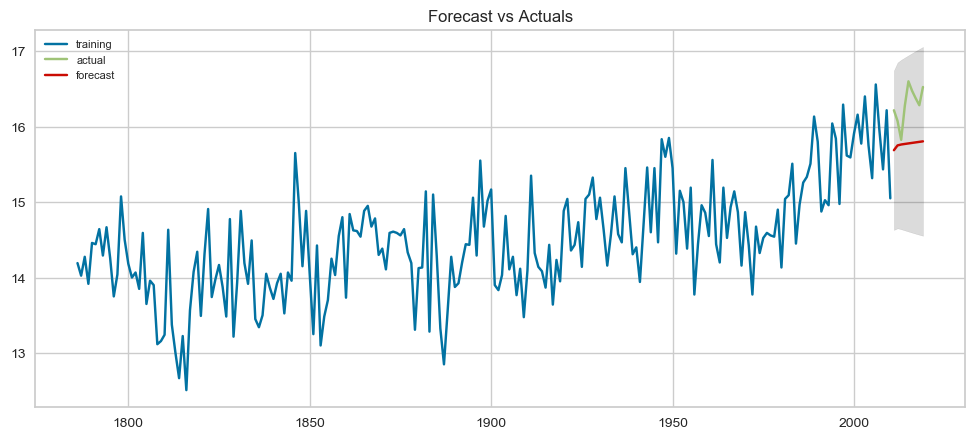

{'mape': 0.032030806913134355,
 'me': -0.5248017595944974,
 'mae': 0.5248017595944974,
 'mpe': -0.032030806913134355,
 'rmse': 0.566975600881753,
 'acf1': 0.348861531141858,
 'corr': 0.41568923715192446,
 'minmax': 0.03203080691313431}

In [20]:
# Build Model
# model = ARIMA(train, order=(1,1,0))  
model_1 = ARIMA(train, order=(1, 1, 1))  
fitted = model_1.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(9, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)


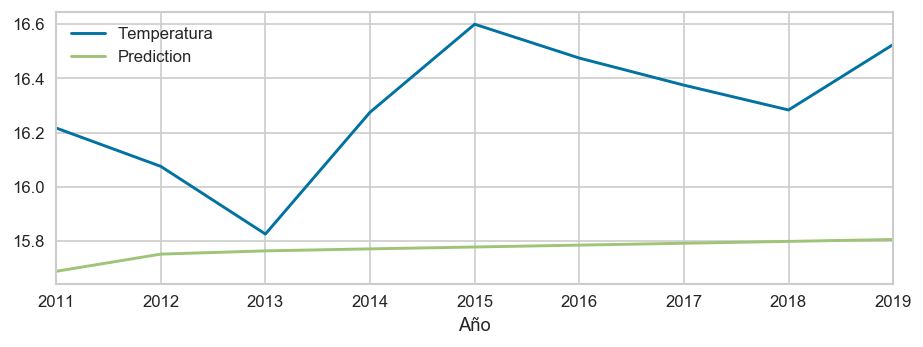

In [21]:
future_forecast = pd.DataFrame(fc,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()


# 3. Utilizando el auto_arima, una forma de probar diferentes términos d,p,q y quedarte con el que  tiene una mejor metrica

In [22]:
import pmdarima as pm

In [23]:
model_auto_1 = pm.auto_arima(train, start_p=0, start_q=0,
                           test='adf',max_p=2, max_q=2, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True, n_jobs=-1, trend='t')

print(model_auto_1.aic())


Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=455.766, BIC=462.589, Fit time=0.528 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=402.413, BIC=412.648, Fit time=0.090 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=368.568, BIC=378.803, Fit time=0.124 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=371.443, BIC=385.090, Fit time=0.131 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=369.168, BIC=382.815, Fit time=0.283 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=371.381, BIC=388.439, Fit time=0.120 seconds
Total fit time: 1.303 seconds
368.5682125903273


In [24]:
future_forecast = model_auto_1.predict(n_periods=9)
future_forecast

array([15.68076224, 15.6955959 , 15.71049518, 15.72546011, 15.74049067,
       15.75558686, 15.77074869, 15.78597616, 15.80126926])

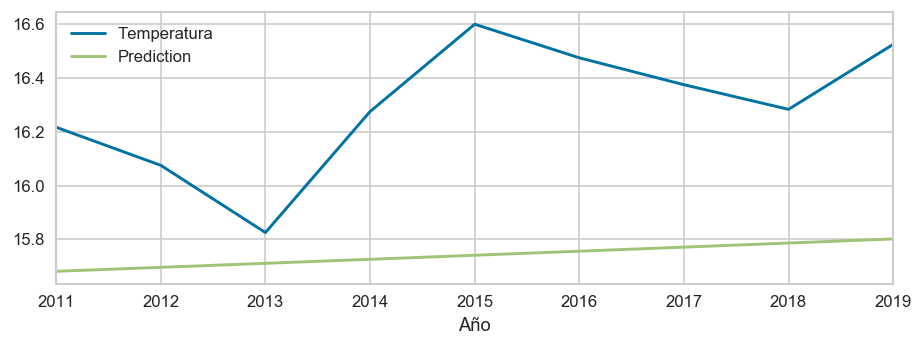

In [25]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()


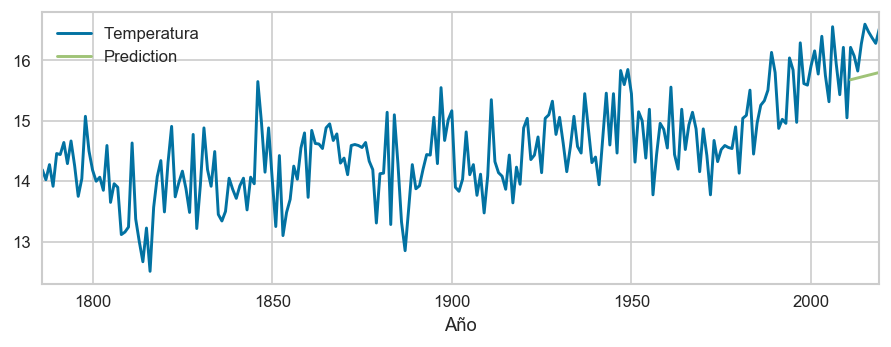

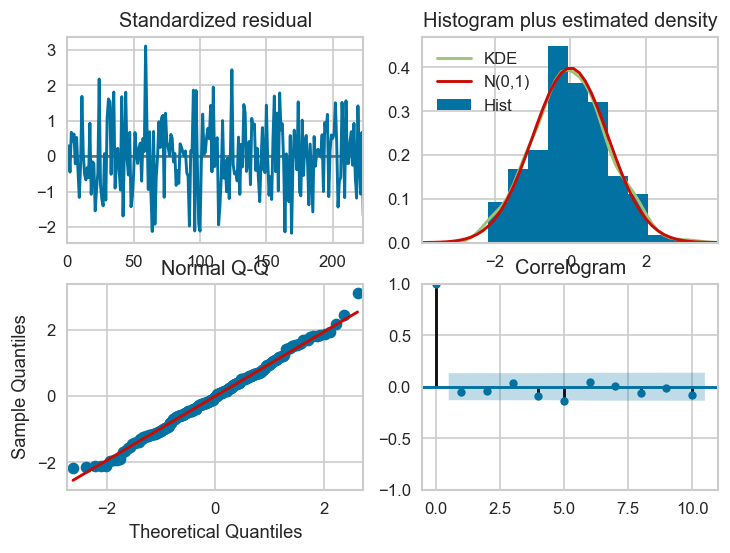

In [26]:
pd.concat([year_avg_t.Temperatura,future_forecast],axis=1).plot()
model_auto_1.plot_diagnostics(figsize=(7,5))
plt.show()

In [27]:
test=pd.concat([test,future_forecast],axis=1)
#test=test.drop(['Prediction'], axis=1)
test.head(10)

,Temperatura,Prediction
Año,,
2011,16.216667,15.680762
2012,16.075000,15.695596
2013,15.825000,15.710495
2014,16.275000,15.725460
2015,16.600000,15.740491
2016,16.475000,15.755587
2017,16.375000,15.770749
2018,16.283333,15.785976
2019,16.525000,15.801269


In [28]:
mape = np.mean(np.abs(test.Prediction - test.Temperatura)/np.abs(test.Temperatura))
me = np.mean(test.Prediction - test.Temperatura)
mae = np.mean(np.abs(test.Prediction - test.Temperatura))
mpe = np.mean((test.Prediction - test.Temperatura)/test.Temperatura) 
rmse = np.mean((test.Prediction - test.Temperatura)**2)**.5
corr = np.corrcoef(test.Prediction, test.Temperatura)[0,1]
mins = np.amin(np.hstack([test.Prediction[:,None], 
                              test.Temperatura[:,None]]), axis=1)
maxs = np.amax(np.hstack([test.Prediction[:,None], 
                              test.Temperatura[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)  
acf1 = acf(test.Prediction-test.Temperatura)[1]
print('Accuracy: \n')
print('Mean Absolute Percentage Error: \n',mape)
print('Mean Error: \n ',me )
print('Mean Absolute Error: \n:',mae)
print('Mean Percentage Error: \n',mpe)
print('Root Mean Squared Error: \n',rmse )
print('Correlation between the Actual and the Forecast: \n',corr)
print('minim: \n',mins)
print('max: \n',maxs)
print('MinMax: \n',minmax)
print('Lag 1 Autocorrelation of Error: \n', acf1)

Accuracy: 

Mean Absolute Percentage Error: 
 0.03381508348015494
Mean Error: 
  -0.5537349925782308
Mean Absolute Error: 
: 0.5537349925782308
Mean Percentage Error: 
 -0.03381508348015494
Root Mean Squared Error: 
 0.5905579300361781
Correlation between the Actual and the Forecast: 
 0.6002931417703594
minim: 
 [15.68076224 15.6955959  15.71049518 15.72546011 15.74049067 15.75558686
 15.77074869 15.78597616 15.80126926]
max: 
 [16.21666667 16.075      15.825      16.275      16.6        16.475
 16.375      16.28333333 16.525     ]
MinMax: 
 0.03381508348015494
Lag 1 Autocorrelation of Error: 
 0.3344634577796199


# definitivo (0,1,1)

In [29]:
index_def=['2020','2021','2022','2023','2024','2025','2026','2027','2028','2029','2030','2031','2032'
       ,'2033','2034','2035','2036','2037','2038','2039','2040','2041','2042','2043','2044','2045','2046','2047','2048','2049','2050']

In [30]:
model_auto = pm.auto_arima(year_avg_t.Temperatura, start_p=0, start_q=0,
                           test='adf',max_p=2, max_q=2, m=1,
                           start_P=0, seasonal=True,
                           d=2, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True, n_jobs=-1, trend='t')

print(model_auto.aic())



Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=718.459, BIC=725.352, Fit time=0.085 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=593.150, BIC=603.491, Fit time=0.082 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=476.350, BIC=486.690, Fit time=0.407 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=435.745, BIC=449.532, Fit time=0.221 seconds
Fit ARIMA: order=(1, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=469.747, BIC=486.981, Fit time=0.385 seconds
Fit ARIMA: order=(2, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=429.400, BIC=450.081, Fit time=0.472 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=444.175, BIC=461.408, Fit time=0.310 seconds
Total fit time: 1.964 seconds
429.40016421295934


In [31]:
# Forecast
future_forecast_def = model_auto.predict(n_periods=31)
future_forecast_def

array([16.49360362, 16.53166032, 16.6005169 , 16.6140682 , 16.67054619,
       16.70499164, 16.74542109, 16.78792494, 16.82619174, 16.86781109,
       16.90764049, 16.94796534, 16.98840997, 17.0285149 , 17.06886543,
       17.10905497, 17.14926939, 17.18947376, 17.22963484, 17.26979761,
       17.30992991, 17.35004676, 17.39014492, 17.43022196, 17.47028125,
       17.51032019, 17.55033994, 17.59034013, 17.63032052, 17.6702813 ,
       17.71022221])

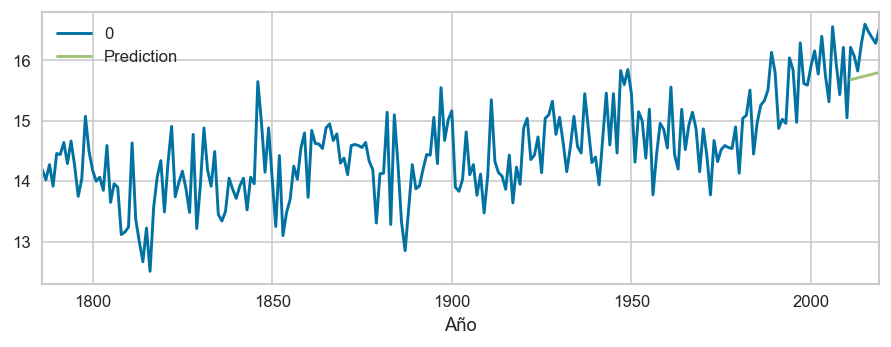

In [32]:
future_forecast_def = pd.DataFrame(future_forecast_def,index = index_def, columns=['Prediction'])
plot_0=pd.concat([year_avg_t.Temperatura,future_forecast],axis=0)

plot_0.plot()

plt.savefig('0XX_prediction_2_presentation.png', dpi=190)



In [33]:
future_forecast_def

,Prediction
2020,16.493604
2021,16.531660
2022,16.600517
2023,16.614068
2024,16.670546
2025,16.704992
2026,16.745421
2027,16.787925
2028,16.826192
2029,16.867811


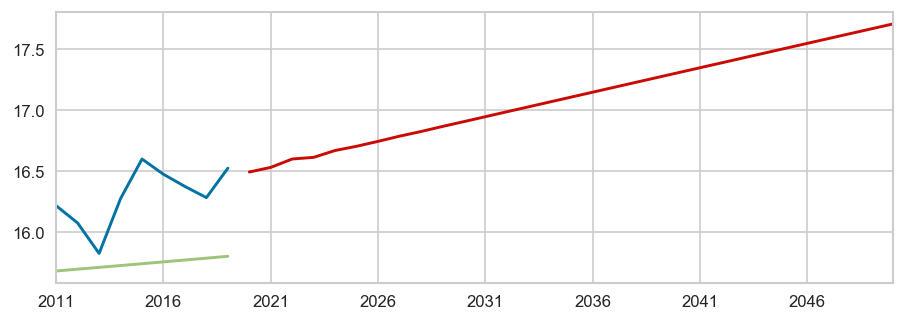

In [48]:
plot_def=pd.concat([test,future_forecast_def],axis=1)

plot_def.plot(legend=False)
plt.savefig('00X_prediction_1_presentation.png', dpi=100)

In [35]:
print(plot_def.tail(10))
print(plot_0.head(10))

      Temperatura  Prediction  Prediction
2041          NaN         NaN   17.350047
2042          NaN         NaN   17.390145
2043          NaN         NaN   17.430222
2044          NaN         NaN   17.470281
2045          NaN         NaN   17.510320
2046          NaN         NaN   17.550340
2047          NaN         NaN   17.590340
2048          NaN         NaN   17.630321
2049          NaN         NaN   17.670281
2050          NaN         NaN   17.710222
              0  Prediction
Año                        
1786  14.191667         NaN
1787  14.025000         NaN
1788  14.275000         NaN
1789  13.916667         NaN
1790  14.458333         NaN
1791  14.441667         NaN
1792  14.641667         NaN
1793  14.291667         NaN
1794  14.666667         NaN
1795  14.258333         NaN


In [36]:
cond = year_avg_t.index == 1786


# calculate value to subtract
first = year_avg_t['Temperatura'].where(cond).ffill().mask(cond)


# perform calculation
year_inclination= (year_avg_t['Temperatura'] + 0.08) 


In [37]:
print(year_inclination.tail(10))
print(year_avg_t.Temperatura.head(10))

Año
2010    15.130000
2011    16.296667
2012    16.155000
2013    15.905000
2014    16.355000
2015    16.680000
2016    16.555000
2017    16.455000
2018    16.363333
2019    16.605000
Name: Temperatura, dtype: float64
Año
1786    14.191667
1787    14.025000
1788    14.275000
1789    13.916667
1790    14.458333
1791    14.441667
1792    14.641667
1793    14.291667
1794    14.666667
1795    14.258333
Name: Temperatura, dtype: float64


In [38]:
plot_1= pd.merge(plot_0, year_inclination, on=['Año'])


In [39]:
plot_1.tail()

,0,Prediction,Temperatura
Año,,,
2017,NaN,15.770749,16.455000
2018,16.283333,NaN,16.363333
2018,NaN,15.785976,16.363333
2019,16.525000,NaN,16.605000
2019,NaN,15.801269,16.605000


In [40]:
plot_1.columns=['real', 'Prediction', 'Tendencia']

In [41]:
future_forecast_def 

,Prediction
2020,16.493604
2021,16.531660
2022,16.600517
2023,16.614068
2024,16.670546
2025,16.704992
2026,16.745421
2027,16.787925
2028,16.826192
2029,16.867811


In [42]:
plot_1.tail(30)

,real,Prediction,Tendencia
Año,,,
1999,15.591667,NaN,15.671667
2000,15.908333,NaN,15.988333
2001,16.158333,NaN,16.238333
2002,15.775000,NaN,15.855000
2003,16.400000,NaN,16.480000
2004,15.750000,NaN,15.830000
2005,15.316667,NaN,15.396667
2006,16.558333,NaN,16.638333
2007,15.950000,NaN,16.030000


In [43]:
df1_a = year_avg_t['Temperatura'].tolist()

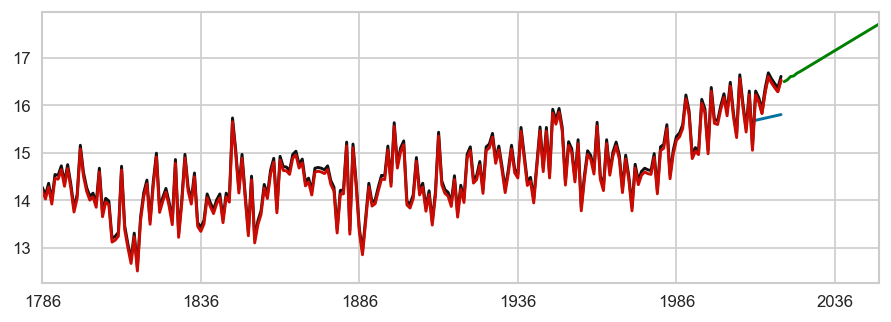

In [50]:
df = pd.concat([test,year_inclination,future_forecast_def,year_avg_t['Temperatura']], axis=1).plot(color=['r','b','k','green'], label=['Pred_test','raise_per_dec','future_forecast','real_data'], legend= False)
#df.interpolate(method='time').plot()

plt.savefig('0XX_prediction_2_presentation.png', dpi=80)




list=[14,1976,14.2052,14.2128,14.2204,14.228, 14.2356
14,2432
14,2508
14,2584
14,266
14,2736
14,2812
14,2888
14,2964
14,304
14,3116
14,3192
14,3268
14,3344
14,342
14,3496
14,3572
14,3648
14,3724
14,38
14,3876
14,3952
14,4028
14,4104
14,418
14,4256
14,4332
14,4408
14,4484
14,456
14,4636
14,4712
14,4788
14,4864
14,494
14,5016
14,5092
14,5168
14,5244
14,532
14,5396
14,5472
14,5548
14,5624
14,57
14,5776
14,5852
14,5928
14,6004
14,608
14,6156
14,6232
14,6308
14,6384
14,646
14,6536
14,6612
14,6688
14,6764
14,684
14,6916
14,6992
14,7068
14,7144
14,722
14,7296
14,7372
14,7448
14,7524
14,76
14,7676
14,7752
14,7828
14,7904
14,798
14,8056
14,8132
14,8208
14,8284
14,836
14,8436
14,8512
14,8588
14,8664
14,874
14,8816
14,8892
14,8968
14,9044
14,912
14,9196
14,9272
14,9348
14,9424
14,95
14,9576
14,9652
14,9728
14,9804
14,988
14,9956
15,0032
15,0108
15,0184
15,026
15,0336
15,0412
15,0488
15,0564
15,064
15,0716
15,0792
15,0868
15,0944
15,102
15,1096
15,1172
15,1248
15,1324
15,14
15,1476
15,1552
15,1628
15,1704
15,178
15,1856
15,1932
15,2008
15,2084
15,216
15,2236
15,2312
15,2388
15,2464
15,254
15,2616
15,2692
15,2768
15,2844
15,292
15,2996
15,3072
15,3148
15,3224
15,33
15,3376
15,3452
15,3528
15,3604
15,368
15,3756
15,3832
15,3908
15,3984
15,406
15,4136
15,4212
15,4288
15,4364
15,444
15,4516
15,4592
15,4668
15,4744
15,482
15,4896
15,4972
15,5048
15,5124
15,52
15,5276
15,5352
15,5428
15,5504
15,558
15,5656
15,5732
15,5808
15,5884
15,596
15,6036
15,6112
15,6188
15,6264
15,634
15,6416
15,6492
15,6568
15,6644
15,672
15,6796
15,6872
15,6948
15,7024
15,71
15,7176
15,7252
15,7328
15,7404
15,748
15,7556
15,7632
15,7708
15,7784
15,786
15,7936
15,8012
15,8088
15,8164
15,824
15,8316
15,8392
15,8468
15,8544
15,862
15,8696
15,8772
15,8848
15,8924
15,9
15,9076
15,9152
15,9228
15,9304
15,938
15,9456
15,9532
15,9608
15,9684
15,976
15,9836
15,9912
15,9988
16,0064
16,014
16,0216
16,0292
16,0368
16,0444
16,052
16,0596
16,0672
16,0748
16,0824
16,09
16,0976
16,1052
16,1128
16,1204
16,128
16,1356
16,1432
16,1508
16,1584
16,166
16,1736
16,1812
16,1888
16,1964
16,204
16,2116
16,2192
16,2268
16,2344
16,242
16,2496
16,2572
16,2648
16,2724
16,28
16,2876
16,2952
16,3028
16,3104
16,318
16,3256
16,3332
16,3408
16,3484
16,356
16,3636
16,3712
16,3788
16,3864
16,394
16,4016
16,4092
16,4168
16,4244
16,432
16,4396
16,4472
16,4548
16,4624
16,47
16,4776
16,4852
16,4928
16,5004
16,508
16,5156
16,5232
16,5308
16,5384
16,546
16,5536
16,5612
16,5688
16,5764
16,584
16,5916
16,5992
16,6068
16,6144
16,622
16,6296
16,6372
16,6448
16,6524
16,66
16,6676
16,6752
16,6828
16,6904
16,698
16,7056
16,7132
16,7208
16,7284
16,736
16,7436
16,7512
16,7588
16,7664
16,774
16,7816
16,7892
16,7968
16,8044
16,812
16,8196
16,8272
16,8348
16,8424
16,85
16,8576
16,8652
16,8728
16,8804
16,888
16,8956
16,9032
16,9108
16,9184
16,926
16,9336
16,9412
16,9488
16,9564
16,964
16,9716
16,9792
16,9868
16,9944
17,002
17,0096
17,0172
17,0248
17,0324
17,04
17,0476
17,0552
17,0628
17,0704
17,078
17,0856
17,0932
17,1008
17,1084
17,116
17,1236
17,1312
17,1388
17,1464
17,154]

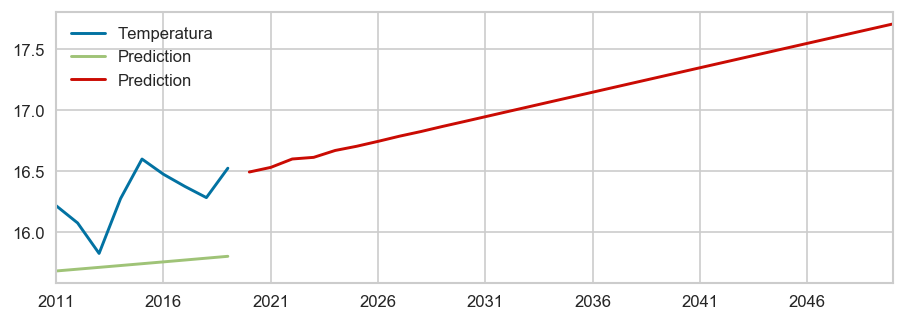

In [45]:
plot_def=pd.concat([test,future_forecast_def],axis=1)
plot_def.plot()
plt.savefig('00X_Prediction_1_presentation.png', dpi=190)

In [46]:
year_avg_t.tail()

,Temperatura,10 Years MA
Año,,
2015,16.600000,16.020000
2016,16.475000,16.011667
2017,16.375000,16.054167
2018,16.283333,16.139167
2019,16.525000,16.170000
